#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

# Good Luck!

In [122]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# 1. Basic Data Exploration
 1- using shape we can know the exact count of rows and columns of the dataframe containing the dataset.
 2- using df.columns attribute we can extract the column names of our dataset
 3- using the .dtypes attribute we get the information abount each column datatype
 4-we can get the number of null rows for each column using two methods :
             a-  we can use the isnull() function which produce a boolean array for all the columns indicating the null values                  then using the .sum() function will get the exact count of the null values
             b- using the .info() function some statistics about the null values and the columns datatypes appear

In [123]:
#get columns and put then in the variable "column_names"
column_names = df.columns


#print the shape of the dataset which contains the number of rows and columns
print('###################################### Data  Count ###############################\n\n')

print(df.shape)


#print the column names
print('###################################### COLUMN NAMES ###############################\n\n')
print(column_names,'\n')


#print the list with coulmn data types
print('###################################### COLUMN Data Types ###############################\n\n')
print(df.dtypes,'\n')


#get the number of null values for each column
print('###################################### NULL Values ###############################\n\n')
#calculating the null values by using the is null to create a boolean array with null values then sum to get the total count
print(df[column_names].isnull().sum())

#another way to identify the null ratio for each column
print(df.info())

(148654, 13)
###################################### COLUMN NAMES ###############################


Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object') 

###################################### COLUMN Data Types ###############################


Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object 

###################################### NULL Values ###############################


Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay   

# 2. Descriptive Statistics

In [134]:
desc_cols = ['BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits']

#using the describe method creates a dataset where mean, min, max, standard deviation and quantiles are calculated
desc = df[des_cols].describe()


'''
#d = des_col.agg('mode')
#d.rename(index={0:'mode'},inplace=True)
#des = des.append( d)

#print(df[des_cols].agg('mode').loc[0])
'''
#calculating mode and adding it to the table with the remaining statistics
desc.loc['mode'] = df[des_cols].agg('mode').loc[0]


#calculating the range for all columns and adding it to the table with remaining statistics
desc.loc['Range'] = des.loc['max'] - des.loc['min']


print('########################## Basic Statistics (mean, standard deviation, min, max, mode, range) ####################\n\n')
#printing descriptive statistics
print(desc,'\n\n')

print('###################################### Salary Range (TotalPay) ###############################\n\n')

#printing the range for the salary alone
print(desc['TotalPay'].loc['Range'])

########################## Basic Statistics (mean, standard deviation, min, max, mode, range) ####################


             BasePay    OvertimePay       OtherPay       Benefits  \
count  148650.000000  148650.000000  148650.000000  148650.000000   
mean    66055.506718    5066.059886    3648.767297   18924.742068   
std     42885.919334   11454.380559    8056.601866   17165.229731   
min      -166.010000      -0.010000   -7058.590000     -33.890000   
25%     32798.550000       0.000000       0.000000       0.000000   
50%     64862.310000       0.000000     811.270000   23217.135000   
75%     94609.715000    4658.175000    4236.065000   33468.980000   
max    319275.010000  245131.880000  400184.250000   96570.660000   
mode        0.000000       0.000000       0.000000       0.000000   
Range  319441.020000  245131.890000  407242.840000   96604.550000   

            TotalPay  TotalPayBenefits  
count  148650.000000     148650.000000  
mean    74770.333901      93695.075969  


# 3. Data Cleaning

In [125]:
'''
remove the columns Notes & Status as the null 
values are 100% which means that the whole column is not useful
'''
#drop notes and status columns which have a 100% null ratio
df.drop(['Status','Notes'] ,axis=1,inplace=True)


df[df['Benefits'].isnull()]['Benefits']
df[df['BasePay'].isnull()]['BasePay']

#we can see that the mode for these columns are 0 so we will replace them with the mode (they are also not huge so we can just remove them)
df['Benefits'].fillna(df['Benefits'].mode()[0],inplace=True)
df['BasePay'].fillna(df['BasePay'].mode()[0],inplace=True)


'''
after investigation for the null values we find there are 4 rows with no data at all
which will not be benificial so we can just drop them
'''
df[df['OvertimePay'].isnull()]
df[df['OtherPay'].isnull()]

#drop the 4 rows with unprovided data
df.dropna(axis=0,inplace = True)
df.reset_index()
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

# 4. Basic Data Visualization

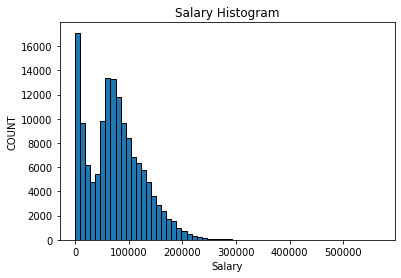

In [126]:
#histogram of salaries
# plot:
fig, ax = plt.subplots()
y = df['TotalPay']


data_bins = np.arange(0,600000,10000)

plt.hist(df['TotalPay'], bins=60, edgecolor="black")
ax.set_title("Salary Histogram") 


# adding labels 
ax.set_xlabel('Salary') 
ax.set_ylabel('COUNT') 

plt.show()


In [127]:
#pie chart

'''
fig = plt.gcf()
fig.set_size_inches(200,200) # or (4,4) or (5,5) or whatever
df['JobTitle'] = df['JobTitle'].str.upper() 
df2 = df.groupby(['JobTitle'])['JobTitle'].count()

sal[sal['Year'] == 2013]['JobTitle'].nunique()



plt.pie(df2, autopct='%1.1f%%')
plt.show()
'''
#too many values for pie chart
#looking at the values there's a lot of duplicates and similar values that could be combined
#df['JobTitle'] = df['JobTitle'].str.replace('1', '').replace('I', '').replace('II', '').replace('III', '').replace('IV', '').strip()
#tried using fuzzy logic but the numbers is still too large
#some job titles has deartment value so will use that instead
df['JobTitle'] = df['JobTitle'].str.upper()
df['JobTitle'] = df['JobTitle'].str.replace(" \("," ,(")
df['JobTitle'] = df['JobTitle'].str.replace(', ,',',')
#for i in df.loc[df['JobTitle'].str.contains('DEPARTMENT\)')]['JobTitle']:
#    print(i)
#df

#df.loc[df['JobTitle'].str.contains('DEPARTMENT\)')]['JobTitle']['Department'] 
df[['Job','Department']] = df.loc[df['JobTitle'].str.contains('DEPARTMENT\)')]['JobTitle'].str.split(',\(',expand=True)
df['Department'] = df['Department'].str.replace(')','')
#df['Department'].fillna('UNKNOWN',inplace=True)
df['Job'] = df['Job'].str.strip()


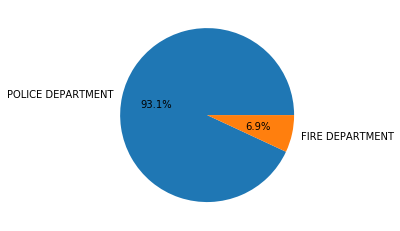

In [128]:
#df[['Job','Department']] = df.loc[df['JobTitle'].str.contains('DEPARTMENT\)')]['JobTitle'].str.split(',\(',expand=True)
#Dep_dict[df['Job']]

plt.pie(df['Department'].value_counts(),labels=df['Department'].value_counts().keys(), autopct='%1.1f%%')
plt.show()


In [66]:
'''
for i in df['JobTitle'].sort_values().unique():
    dups = (
    process.extractBests(
    i,
        df['JobTitle']
    ,score_cutoff=90,
                                  limit=None
))
    dup_vals =   [x[0] for x in dups]
    df['JobTitle'] = df['JobTitle'].replace(dup_vals, i) 
    print(i)
'''

"\nfor i in df['JobTitle'].sort_values().unique():\n    dups = (\n    process.extractBests(\n    i,\n        df['JobTitle']\n    ,score_cutoff=90,\n                                  limit=None\n))\n    dup_vals =   [x[0] for x in dups]\n    df['JobTitle'] = df['JobTitle'].replace(dup_vals, i) \n    print(i)\n"

In [47]:
'''
df2 = df.groupby(['JobTitle'])
df2.groups.keys()
df2['JobTitle'].count()


plt.pie(df2['JobTitle'].count(),labels=df2.groups.keys(), autopct='%1.1f%%')
plt.show()
plot = df.plot.pie(y='JobTitle', figsize=(5, 5))

'''

"\ndf2 = df.groupby(['JobTitle'])\ndf2.groups.keys()\ndf2['JobTitle'].count()\n\n\nplt.pie(df2['JobTitle'].count(),labels=df2.groups.keys(), autopct='%1.1f%%')\nplt.show()\nplot = df.plot.pie(y='JobTitle', figsize=(5, 5))\n\n"

# 5.Grouped Analysis

In [157]:
#display the mean for all numerical (income) variables
grouped_df = df.groupby(['JobTitle']).mean()
print(grouped_df['TotalPay'])

JobTitle
ACCOUNT CLERK                                     43009.395299
ACCOUNTANT                                        47429.268000
ACCOUNTANT I                                      62036.101250
ACCOUNTANT II                                     67355.202699
ACCOUNTANT III                                    79001.071547
                                                      ...     
WORKER'S COMPENSATION SUPERVISOR I                91020.726000
X-RAY LABORATORY AIDE                             51212.279048
YOUTH COMM ADVISOR                                41414.307500
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870000
ZOO CURATOR                                       66686.560000
Name: TotalPay, Length: 1636, dtype: float64


# 6.Simple Correlation Analysis

In [144]:
#correlation matrix showing the relation between salary and other variables
df[desc_cols].corr()['TotalPay']

BasePay             0.954690
OvertimePay         0.504859
OtherPay            0.470496
Benefits            0.632187
TotalPay            1.000000
TotalPayBenefits    0.977312
Name: TotalPay, dtype: float64

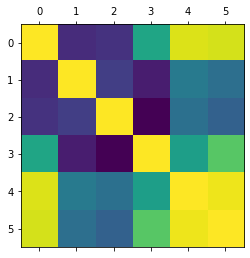

In [148]:
###heat map to display the relationship between all variables
plt.matshow(df[des_cols].corr())
plt.show()

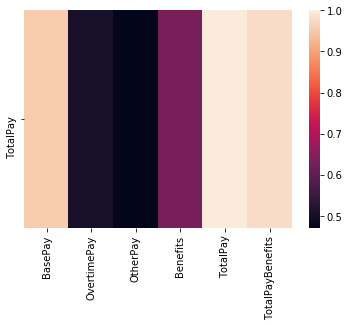

In [149]:
###heatmap between Salary and other variables
sns.heatmap(df[des_cols].corr().loc[['TotalPay'],:])


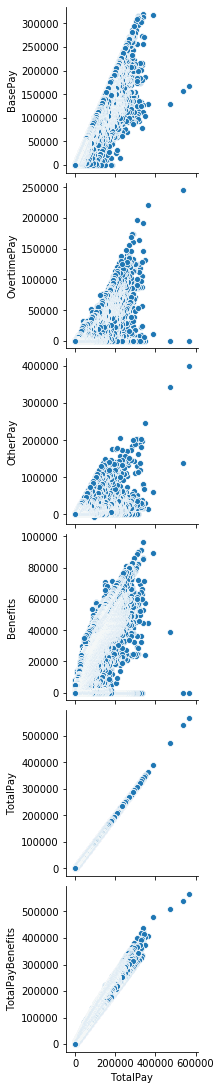

In [153]:
###scatter plot between salary and all variables

#sns.pairplot(df[des_cols])
#sns.pairplot(df, y_vars="TotalPay", x_vars=df.columns.values)
pp = sns.pairplot(data=df,
                  x_vars=['TotalPay'],
                  y_vars=desc_cols)


# Summary of Insights

In [ ]:
#1.a we are able to identify the number of rows and data types using (shape, dtypes) attributes
#1.b we can also find the information about the null values using either isnull followed by sum functions or by using .info() function



#2.using the .describe() method we are able to get most of the statistics we need 
#2. WE ARE ABLE TO GET THE range using max - min on the result of describe
#2. and we are able to get the mode using simply the mode() method and we are able to append both to the result of describe ()
#2. looking at this data (mean, std , range) it seems there are a lot of contrast between the salaries for different jobs
#2. and looking at the mode it looks that the most frequent value for most of the column is 0 which might mean there's a data issue or that they are underpaid jobs




#3. since the columns "Notes" & "Status" are 100% null columns it makes sense to drop them completely 
#3. since the percentage of null values for the columns "Benefits" & "BasePay" we can just drop the null rows but i choose to replcae the null values with the mode since it is the mos occuring value
#3. i could also see that there are 4 rows where there are no data provided at all so i chose to drop these rows since they are no so many and there's no useful data 
#3.




#4.from the histogram of the salary it appeares that the salary distribution is skewed 
#4.and it seems that most salaries are either less than 20k or from 50k to 100k.
#4.for the pie chart of Department it appears that no Department column was provided so i tried to use the Jobtitle column
#4.but since there was too many values the pi chart was not very useful so i tried to use fuzzy matching to shrink down the count by standardizing similar jobs like accountant 1 & accountant 2
#4.but the number of values was still too large so i extracted the Department from the JoTitles with "Department)" suffix and i found that there are two Department (Police & Fire) Departments with the majority of Dpartments as null with more than a 99%




#5.group by and then the mean() function was used to get the average salary for each Job Title



#6.to explore the relationship between salary and other variables in the dataset i used the correlation function which produced numbers between 0 to 1 indicating how close the relationship is 
#6.and also heatmap using the matshow or the heatmap function can help to visualise this relationship as a colored plot 
#6.using these information and alos the visual input from the scatter plot we can see that there are two variables that are highly correlated with the Salary variable which are "BasePay" & "TotalPayBenefits"


